In [11]:
import numpy as np
import imgaug.augmenters as iia
import cv2
import matplotlib.pyplot as plt
np.random.bit_generator = np.random._bit_generator

(240, 320, 6)


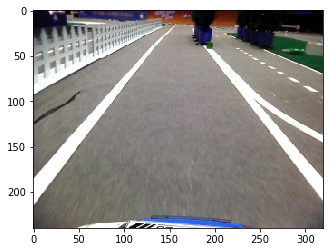

In [119]:
image = cv2.imread('./Data/Road/Raw/Phong - 1/1558735106.74_15.0_0.0.jpg')
plt.imshow(image)
image = np.concatenate((image, image), 2)
print(image.shape)

In [14]:
seq = iia.Sequential([
    iia.Crop(px=(1, 16), keep_size=False),
    iia.Fliplr(0.5),
    iia.GaussianBlur(sigma=(0, 3.0))
])

In [20]:
img_aug = seq(image=image)

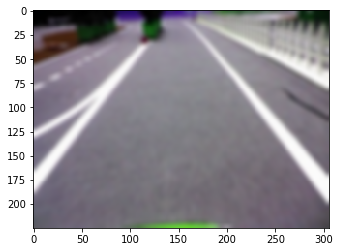

In [24]:
plt.imshow(img_aug[:, :, 1:4])

In [97]:
label_unchange = []
label_unchange.append(iia.Sequential([
    iia.Add((-40, 40))
]))

label_unchange.append(iia.Sequential([
    iia.Add((-40, 40), True)
]))

label_unchange.append(iia.Sequential([
    iia.AdditiveGaussianNoise(0.3 * 255)
]))

label_unchange.append(iia.Sequential([
    iia.AdditiveGaussianNoise(0.3 * 255, per_channel=True)
]))

label_unchange.append(iia.Sequential([
    iia.AdditiveLaplaceNoise(0.1 * 255)
]))

label_unchange.append(iia.Sequential([
    iia.AdditivePoissonNoise(0.08* 255)
]))

label_unchange.append(iia.Sequential([
    iia.ImpulseNoise(0.1)
]))

label_unchange.append(iia.Sequential([
    iia.GaussianBlur(1.0)
]))

label_unchange.append(iia.Sequential([
    iia.MotionBlur(7, (0, 360))
]))

label_unchange.append(iia.Sequential([
    iia.MultiplyHueAndSaturation(1.25)
]))

label_unchange.append(iia.Sequential([
    iia.GammaContrast((0.5, 1.75), True)
]))

label_unchange.append(iia.Sequential([
    iia.AllChannelsHistogramEqualization()
]))

label_unchange.append(iia.Sequential([
    iia.Dropout(0.2, True)
]))

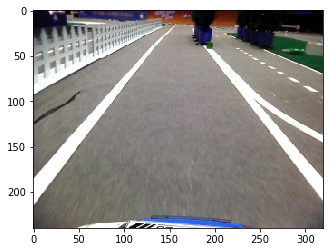

In [98]:
imgs = []
for aug in label_unchange:
    imgs.append(aug(image=image))
plt.imshow(image)

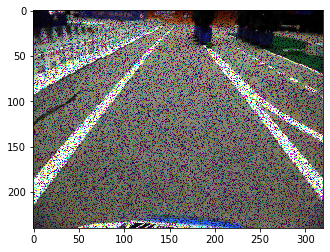

In [99]:
plt.imshow(imgs[12])

In [102]:
label_change= []
label_change.append(iia.Sequential([
    iia.Fliplr(0.5)
]))

label_change.append(iia.Sequential([
    iia.Affine(1.1, shear=(-0.5, 0.5))
]))

label_change.append(iia.Sequential([
    iia.PerspectiveTransform(0.1)
]))

In [121]:
imgs = []
for aug in label_change:
    imgs.append(aug(image=image))
# plt.imshow(image)

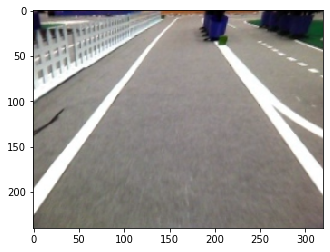

In [124]:
plt.imshow(imgs[2][:, :, :3])